In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

<IPython.core.display.Javascript object>


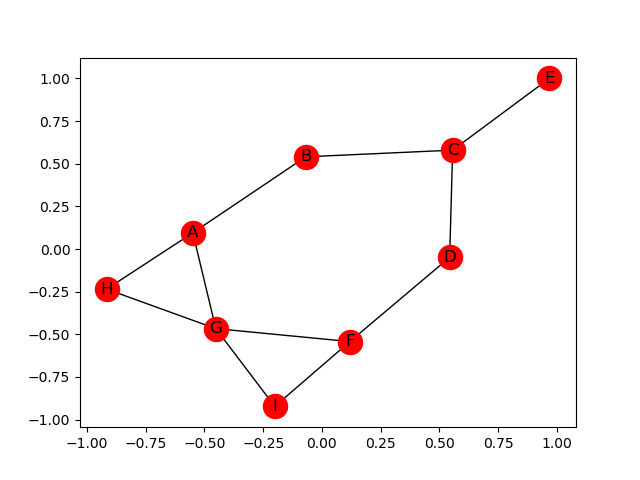

In [35]:
G.add_edges_from([('A','B'),('A','G'),('A','H'),('C','B'),('D','C'),('E','C'),('H','G'),('G','I'),('G','F'),('D','F'),('F','I')])
%matplotlib notebook
pos = nx.spring_layout(G)
edges = G.edges()
nx.draw_networkx(G, pos=pos, edges=edges)

In [36]:
degree = G.degree()
degree

DegreeView({'A': 3, 'B': 2, 'G': 4, 'H': 2, 'C': 3, 'D': 2, 'E': 1, 'I': 2, 'F': 3})

In [37]:
degrees= dict(degree)
degrees_values = sorted(set(degrees.values()))
degrees_values

[1, 2, 3, 4]

In [38]:
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degrees_values]
histogram

[0.1111111111111111,
 0.4444444444444444,
 0.3333333333333333,
 0.1111111111111111]

In [75]:
nx.number_of_nodes(G)

9

<IPython.core.display.Javascript object>


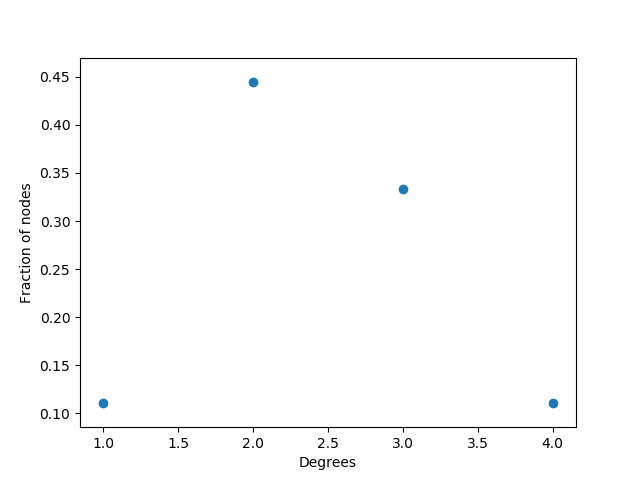

In [39]:
import matplotlib.pyplot as plt
plt.figure(2)
plt.scatter(degrees_values,histogram)
plt.xlabel('Degrees')
plt.ylabel('Fraction of nodes')
plt.show()

<IPython.core.display.Javascript object>


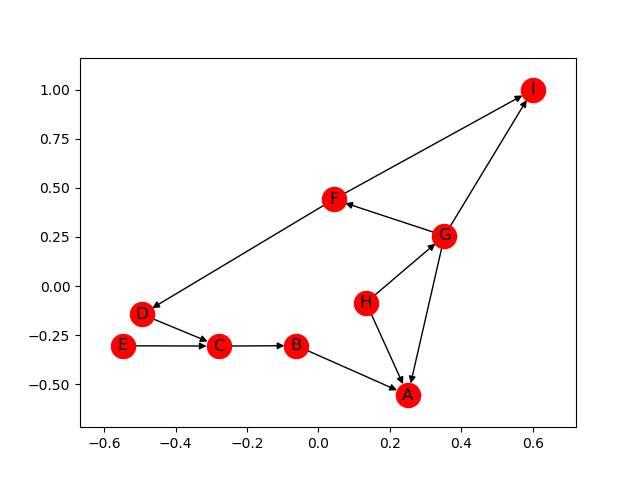

In [61]:
G1 = nx.DiGraph()
G1.add_edges_from([('B','A'),('G','A'),('H','A'),('H','G'),('C','B'),('D','C'),('E','C'),
                   ('G','I'),('G','F'),('F','D'),('F','I')])
%matplotlib notebook
pos = nx.spring_layout(G1)
edges = G1.edges()
nx.draw_networkx(G1, pos=pos, edges=edges)

In [40]:
#in-degree distripution
in_degree=G1.in_degree()


In [41]:
in_degree_value = dict(in_degree)
in_degrees_values = sorted(set(in_degree_value.values()))
in_degree_value

{'B': 1, 'A': 3, 'G': 1, 'H': 0, 'C': 2, 'D': 1, 'E': 0, 'I': 2, 'F': 1}

In [42]:
histogram1 =[list(in_degree_value.values()).count(i)/float(nx.number_of_nodes(G1)) for i in in_degrees_values]
histogram1

[0.2222222222222222,
 0.4444444444444444,
 0.2222222222222222,
 0.1111111111111111]

<IPython.core.display.Javascript object>


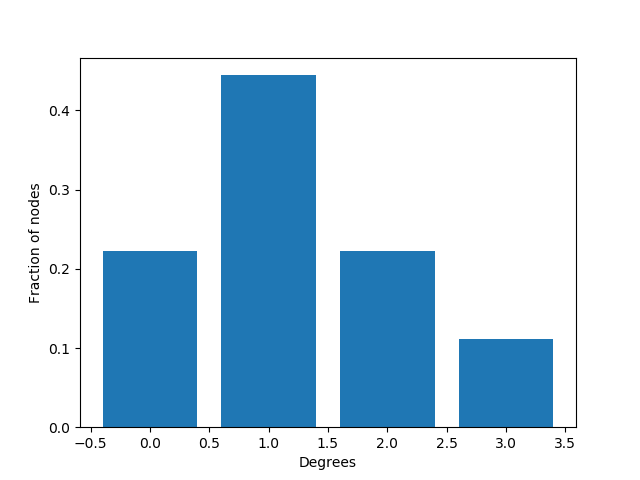

In [52]:
plt.figure()
plt.bar(in_degrees_values,histogram1)
plt.xlabel('Degrees')
plt.ylabel('Fraction of nodes')
plt.show()

<IPython.core.display.Javascript object>


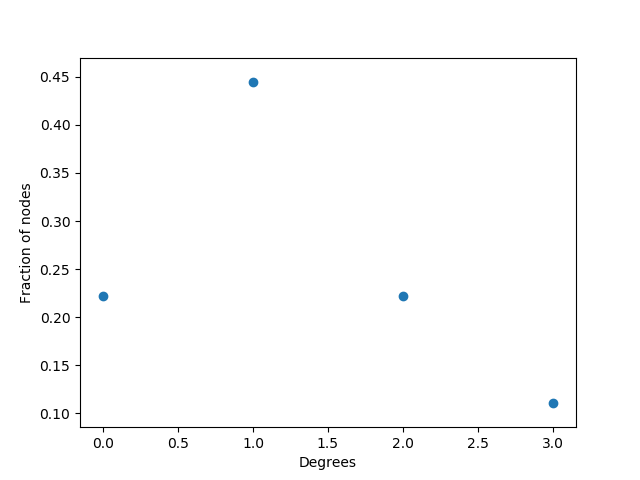

In [106]:
plt.figure()
plt.scatter(in_degrees_values,histogram1)
plt.xlabel('Degrees')
plt.ylabel('Fraction of nodes')
plt.show()

In [44]:
# The thing to notice here is that as node two started to get larger and larger degree, 
#its probability of getting a new edge became larger and larger as well. 

<IPython.core.display.Javascript object>


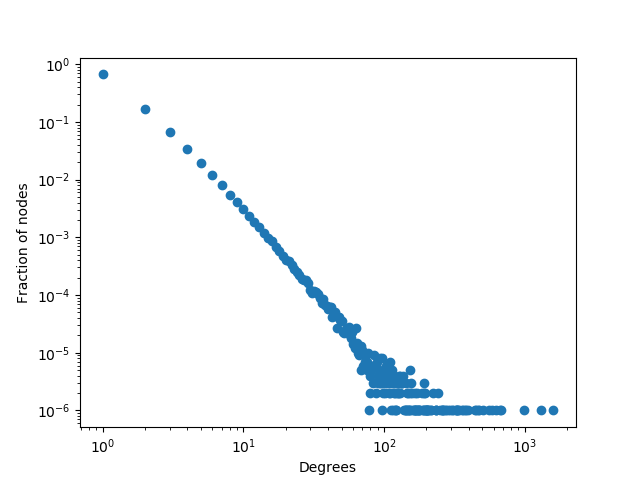

In [8]:
import matplotlib.pyplot as plt
#nx.barabasi_albert_graph(n.m)
# n = Number of nodes
#m = Number of edges to attach from a new node to existing nodes
GI = nx.barabasi_albert_graph(1000000,1)
#%matplotlib notebook
#nx.draw(GI, with_labels=True)
deg = GI.degree()
degs = dict(deg)
degrees_values = sorted(set(degs.values()))
histogram =[list(degs.values()).count(i)/float(nx.number_of_nodes(GI)) for i in degrees_values]
plt.plot(degrees_values,histogram,'o')
plt.xlabel('Degrees')
plt.ylabel('Fraction of nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
#path lenght and clustering
#social network tends to have high clustering cofficent and smallaverage path lenght
#can we think network generative model that has these two propaprietes?
#how about the preferential attachmeny model ?

In [4]:
GB = nx.barabasi_albert_graph(1000,4)
print(nx.average_clustering(GB))

0.035556943606674475


In [10]:
print(nx.average_shortest_path_length(GB))

3.1795695695695696


In [9]:
print(nx.average_clustering(GI))

0.0


In [ ]:
print(nx.average_shortest_path_length(GI))

In [17]:
f= nx.barabasi_albert_graph(100,5)

In [18]:
print(nx.average_clustering(f))

0.26767972513643445


In [19]:
print(nx.average_shortest_path_length(f))

2.1858585858585857


In [23]:
#small world model
#watts_strogatz_graph(n,k,p)
t = nx.watts_strogatz_graph(1000,6,.04)

In [24]:
print(nx.average_clustering(t))

0.5305928571428628


In [25]:
print(nx.average_shortest_path_length(t))

8.60353953953954


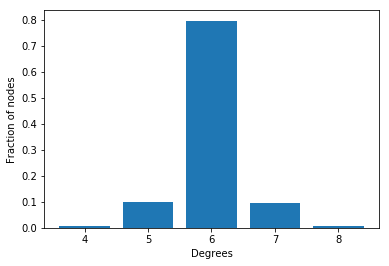

In [32]:
deg = t.degree()
degs = dict(deg)
degrees_values = sorted(set(degs.values()))
histogram =[list(degs.values()).count(i)/float(nx.number_of_nodes(t)) for i in degrees_values]
plt.figure()
plt.bar(degrees_values,histogram)
plt.xlabel('Degrees')
plt.ylabel('Fraction of nodes')

plt.show()

<IPython.core.display.Javascript object>


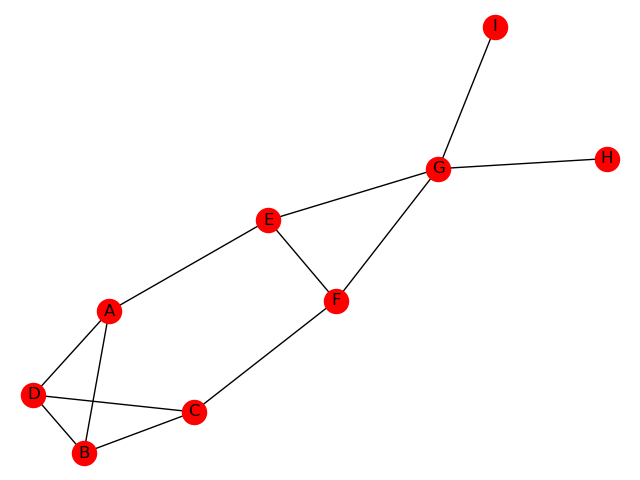

C:\Users\abduo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [3]:
# method 1 :common neighbours 
#intersection between 2 nodes
GCN = nx.Graph([('A','B'),('A','D'),('A','E'),('C','B'),('D','C'),('B','D'),('E','F'),('F','C'),('G','E'),
                ('G','F'),('G','H'),('G','I')])
%matplotlib notebook
nx.draw(GCN, with_labels=True)

In [4]:
#common_neighbors(G, u, v)
#G:graph....uand v is a nodes 
common_neigh = [(e[0],e[1],len(list(nx.common_neighbors(GCN,e[0],e[1])))) for e in nx.non_edges(GCN)]

In [5]:
# I'm creating a list of tuples which have the two nodes and the number of common neighbors
#non edges ...nodes doesn't connect with each other 
common_neigh

[('C', 'A', 2),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('A', 'F', 1),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('A', 'G', 1),
 ('H', 'I', 1),
 ('H', 'D', 0),
 ('H', 'F', 1),
 ('H', 'E', 1),
 ('H', 'B', 0),
 ('I', 'F', 1),
 ('I', 'B', 0),
 ('I', 'D', 0),
 ('I', 'E', 1),
 ('D', 'F', 1),
 ('D', 'G', 0),
 ('D', 'E', 1),
 ('F', 'B', 1),
 ('E', 'B', 1),
 ('G', 'B', 0)]

In [20]:
import operator 
sorted(common_neigh,key=operator.itemgetter(2),reverse=True)


[('C', 'A', 2),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('A', 'F', 1),
 ('A', 'G', 1),
 ('H', 'I', 1),
 ('H', 'F', 1),
 ('H', 'E', 1),
 ('I', 'F', 1),
 ('I', 'E', 1),
 ('D', 'F', 1),
 ('D', 'E', 1),
 ('F', 'B', 1),
 ('E', 'B', 1),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('I', 'B', 0),
 ('I', 'D', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

In [21]:
#method 2 :Jaccard coefficient : number of common neighbors normalized by the total number of neighbors 
# intersection between 2 nodes /  total number of neighbours they have
L= list(nx.jaccard_coefficient(GCN))

In [22]:
L

[('C', 'A', 0.5),
 ('C', 'H', 0.0),
 ('C', 'I', 0.0),
 ('C', 'E', 0.2),
 ('C', 'G', 0.16666666666666666),
 ('A', 'F', 0.2),
 ('A', 'I', 0.0),
 ('A', 'H', 0.0),
 ('A', 'G', 0.16666666666666666),
 ('H', 'I', 1.0),
 ('H', 'D', 0.0),
 ('H', 'F', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('H', 'B', 0.0),
 ('I', 'F', 0.3333333333333333),
 ('I', 'B', 0.0),
 ('I', 'D', 0.0),
 ('I', 'E', 0.3333333333333333),
 ('D', 'F', 0.2),
 ('D', 'G', 0.0),
 ('D', 'E', 0.2),
 ('F', 'B', 0.2),
 ('E', 'B', 0.2),
 ('G', 'B', 0.0)]

In [26]:
sorted(L,key=operator.itemgetter(2),reverse=True)

[('H', 'I', 1.0),
 ('C', 'A', 0.5),
 ('H', 'F', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('I', 'F', 0.3333333333333333),
 ('I', 'E', 0.3333333333333333),
 ('C', 'E', 0.2),
 ('A', 'F', 0.2),
 ('D', 'F', 0.2),
 ('D', 'E', 0.2),
 ('F', 'B', 0.2),
 ('E', 'B', 0.2),
 ('C', 'G', 0.16666666666666666),
 ('A', 'G', 0.16666666666666666),
 ('C', 'H', 0.0),
 ('C', 'I', 0.0),
 ('A', 'I', 0.0),
 ('A', 'H', 0.0),
 ('H', 'D', 0.0),
 ('H', 'B', 0.0),
 ('I', 'B', 0.0),
 ('I', 'D', 0.0),
 ('D', 'G', 0.0),
 ('G', 'B', 0.0)]

In [30]:
#measure 3 : resource allocation
#draction of resource that node can send to another node through their common neighbors
LS = list(nx.resource_allocation_index(GCN))
sorted(LS,key=operator.itemgetter(2),reverse=True)


[('C', 'A', 0.6666666666666666),
 ('C', 'E', 0.3333333333333333),
 ('C', 'G', 0.3333333333333333),
 ('A', 'F', 0.3333333333333333),
 ('A', 'G', 0.3333333333333333),
 ('D', 'F', 0.3333333333333333),
 ('D', 'E', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('H', 'I', 0.25),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('I', 'B', 0),
 ('I', 'D', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

In [31]:
#measure 4 : adamic_adar index :similar to resource allocation but with log in denominator
LA = list(nx.adamic_adar_index(GCN))
sorted(LA,key=operator.itemgetter(2),reverse=True)


[('C', 'A', 1.8204784532536746),
 ('C', 'E', 0.9102392266268373),
 ('C', 'G', 0.9102392266268373),
 ('A', 'F', 0.9102392266268373),
 ('A', 'G', 0.9102392266268373),
 ('D', 'F', 0.9102392266268373),
 ('D', 'E', 0.9102392266268373),
 ('F', 'B', 0.9102392266268373),
 ('E', 'B', 0.9102392266268373),
 ('H', 'I', 0.7213475204444817),
 ('H', 'F', 0.7213475204444817),
 ('H', 'E', 0.7213475204444817),
 ('I', 'F', 0.7213475204444817),
 ('I', 'E', 0.7213475204444817),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('I', 'B', 0),
 ('I', 'D', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

In [32]:
#measure 5 : pref.attachment : in the preferential attachment nodes with high degress get more neoghbours [[بدهيات]]
#degree of node1 *degree of node 2 
LP = list(nx.preferential_attachment(GCN))
sorted(LP,key=operator.itemgetter(2),reverse=True)

[('C', 'G', 12),
 ('A', 'G', 12),
 ('D', 'G', 12),
 ('G', 'B', 12),
 ('C', 'A', 9),
 ('C', 'E', 9),
 ('A', 'F', 9),
 ('D', 'F', 9),
 ('D', 'E', 9),
 ('F', 'B', 9),
 ('E', 'B', 9),
 ('C', 'H', 3),
 ('C', 'I', 3),
 ('A', 'I', 3),
 ('A', 'H', 3),
 ('H', 'D', 3),
 ('H', 'F', 3),
 ('H', 'E', 3),
 ('H', 'B', 3),
 ('I', 'F', 3),
 ('I', 'B', 3),
 ('I', 'D', 3),
 ('I', 'E', 3),
 ('H', 'I', 1)]

In [38]:
#community common neihgbour : number of common with bonus for neighbours in same community
#assign nodes to communities with attribuites
GCN.node['A']['community'] = 0
GCN.node['B']['community'] = 0
GCN.node['C']['community'] = 0
GCN.node['D']['community'] = 0
GCN.node['E']['community'] = 1
GCN.node['F']['community'] = 1
GCN.node['G']['community'] = 1
GCN.node['H']['community'] = 1
GCN.node['I']['community'] = 1

In [40]:
LC = list(nx.cn_soundarajan_hopcroft(GCN))
sorted(LC,key=operator.itemgetter(2),reverse=True)

[('C', 'A', 4),
 ('H', 'I', 2),
 ('H', 'F', 2),
 ('H', 'E', 2),
 ('I', 'F', 2),
 ('I', 'E', 2),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('A', 'F', 1),
 ('A', 'G', 1),
 ('D', 'F', 1),
 ('D', 'E', 1),
 ('F', 'B', 1),
 ('E', 'B', 1),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('I', 'B', 0),
 ('I', 'D', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

In [43]:
#community resource allocation : simialr to resource allocation index with consider nodes in same community
#A,G not in same community so F(u) = 0 and 0/3 =0
LR = list(nx.ra_index_soundarajan_hopcroft(GCN))
sorted(LR,key=operator.itemgetter(2),reverse=True)

[('C', 'A', 0.6666666666666666),
 ('H', 'I', 0.25),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('C', 'E', 0),
 ('C', 'G', 0),
 ('A', 'F', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('A', 'G', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('I', 'B', 0),
 ('I', 'D', 0),
 ('D', 'F', 0),
 ('D', 'G', 0),
 ('D', 'E', 0),
 ('F', 'B', 0),
 ('E', 'B', 0),
 ('G', 'B', 0)]

In [44]:
"""I want to point out two things. One, none of these measures actually tell you whether or not you should predict that a
particular edge is going to come up in the future or not. It just gives a score 
that is supposed to give you a sense for whether or not these two nodes are likely to connect.
The second thing is that different measures can give you different scores, right? So for example, 
we saw that some measures would give the edge H, I, a higher score that A,G and some measures would do the opposite. 
And so these measures aren't necessarily consistent with each other. So if you're actually trying to solve the link-prediction 
problem, typically what would happen is that you would use these measures as features. And then you would use a classifier,
if you have some label data, you would train a classifier and use these measures as features in order to make the prediction"""

"d I want to point out two things. One, none of these measures actually tell you whether or not you should predict that a\nparticular edge is going to come up in the future or not. It just gives a score \nthat is supposed to give you a sense for whether or not these two nodes are likely to connect.\nThe second thing is that different measures can give you different scores, right? So for example, \nwe saw that some measures would give the edge H, I, a higher score that A,G and some measures would do the opposite. \nAnd so these measures aren't necessarily consistent with each other. So if you're actually trying to solve the link-prediction \nproblem, typically what would happen is that you would use these measures as features. And then you would use a classifier,\nif you have some label data, you would train a classifier and use these measures as features in order to make the prediction"

<IPython.core.display.Javascript object>


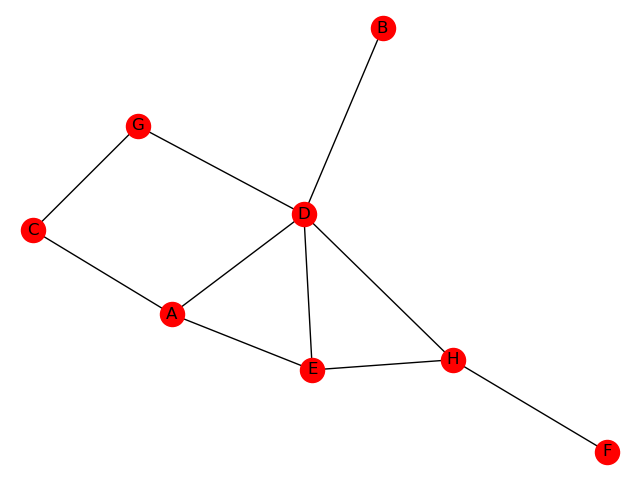

C:\Users\abduo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [2]:
N = nx.Graph([('A','D'),('A','C'),('A','E'),('C','G'),('G','D'),('D','E'),('B','D'),('E','H'),('H','F'), 
              ('D','H')])
%matplotlib notebook
nx.draw(N, with_labels=True)

In [4]:
import operator
ls = list(nx.resource_allocation_index(N))
sorted(ls,key=operator.itemgetter(2),reverse=True)


[('C', 'D', 0.8333333333333333),
 ('A', 'G', 0.7),
 ('A', 'H', 0.5333333333333333),
 ('E', 'C', 0.3333333333333333),
 ('E', 'F', 0.3333333333333333),
 ('F', 'D', 0.3333333333333333),
 ('A', 'B', 0.2),
 ('E', 'B', 0.2),
 ('E', 'G', 0.2),
 ('G', 'B', 0.2),
 ('G', 'H', 0.2),
 ('H', 'B', 0.2),
 ('A', 'F', 0),
 ('G', 'F', 0),
 ('H', 'C', 0),
 ('F', 'B', 0),
 ('F', 'C', 0),
 ('B', 'C', 0)]

In [6]:
N.node['A']['community'] = 0
N.node['B']['community'] = 0
N.node['C']['community'] = 0
N.node['D']['community'] = 0
GCN.node['E']['community'] = 1
GCN.node['F']['community'] = 1
GCN.node['G']['community'] = 1
GCN.node['H']['community'] = 1
GCN.node['I']['community'] = 1
lr = list(nx.ra_index_soundarajan_hopcroft(N))
sorted(lr,key=operator.itemgetter(2),reverse=True)

NetworkXAlgorithmError: No community information

<IPython.core.display.Javascript object>


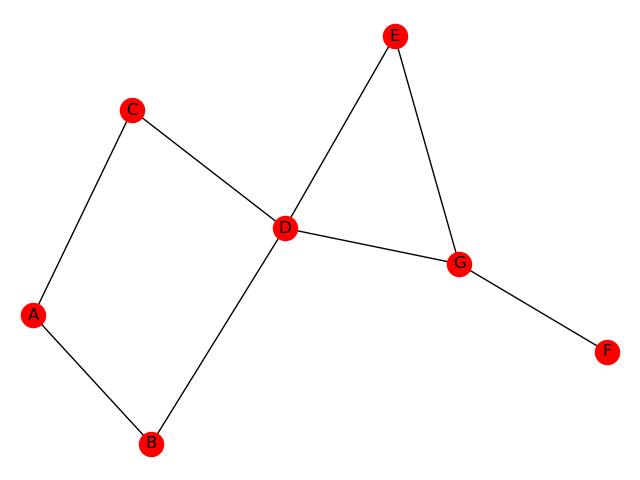

In [4]:
G.add_edges_from([('A','B'),('A','C'),('D','B'),('D','C'),('D','E'),('D','G'),('E','G'),('F','G')])
%matplotlib notebook
nx.draw(G, with_labels=True)

In [6]:
nx.edge_betweenness_centrality(G, normalized=False)

{('A', 'B'): 3.5,
 ('A', 'C'): 3.5,
 ('B', 'D'): 6.5,
 ('C', 'D'): 6.5,
 ('D', 'E'): 4.0,
 ('D', 'G'): 8.0,
 ('E', 'G'): 2.0,
 ('G', 'F'): 6.0}

In [7]:
nx.closeness_centrality(G)

{'A': 0.42857142857142855,
 'B': 0.5454545454545454,
 'C': 0.5454545454545454,
 'D': 0.75,
 'E': 0.5454545454545454,
 'G': 0.6,
 'F': 0.4}

KeyError: <networkx.classes.graph.Graph object at 0x000001F53F50D828>